## Table of Contents  
1. [Preliminary Work on the Datasets](#1)<br>
2. [Cleaning of Datasets](#2)<br>
3. [Data Manipulation to Obtain Subsets and Aggregated Values](#3)<br>
<!--     3.1 [Sub Setting and Filtering](#3.1)<br> -->
    3.2 [Aggregated Values](#3.2)<br>
    3.3 [Additional Data](#3.3)<br>
    3.4 [Merging / Concatenating of Dataframes](#3.4)<br>
4. [Visualisation](#4)

# 1. <a name="1"></a>Preliminary Work on the Datasets

### Inspection of Dataset

In [153]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# Define a list of columns to read
columnslist = ['company', 'location', 'dates', 'job-title', 'summary', 'pros', 'cons', 'advice-to-mgmt', 'overall-ratings', 'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars','senior-mangemnet-stars', 'helpful-count']

In [155]:
# Read employee_reviews.csv with ISO-8859-1 encoding
df = pd.read_csv('employee_reviews.csv', sep = ',', encoding = 'ISO-8859-1', usecols = columnslist)

In [156]:
# Inspect the first few lines of the dataset
df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count
0,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0
1,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094
2,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,4,5,5,4,949
3,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2,5,5,4,5,498
4,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5,5,5,5,5,49


In [157]:
# Display a tuple representing the dimensionality
df.shape

(67529, 15)

In [158]:
# Display a list of column names
df.columns

Index(['company', 'location', 'dates', 'job-title', 'summary', 'pros', 'cons',
       'advice-to-mgmt', 'overall-ratings', 'work-balance-stars',
       'culture-values-stars', 'carrer-opportunities-stars',
       'comp-benefit-stars', 'senior-mangemnet-stars', 'helpful-count'],
      dtype='object')

In [159]:
# Display if there are any missing values in columns
df.isnull().sum()

company                         0
location                        0
dates                           0
job-title                       0
summary                       120
pros                            0
cons                            0
advice-to-mgmt                297
overall-ratings                 0
work-balance-stars              0
culture-values-stars            0
carrer-opportunities-stars      0
comp-benefit-stars              0
senior-mangemnet-stars          0
helpful-count                   0
dtype: int64

In [160]:
# Display data types of each columns
df.dtypes

company                       object
location                      object
dates                         object
job-title                     object
summary                       object
pros                          object
cons                          object
advice-to-mgmt                object
overall-ratings                int64
work-balance-stars            object
culture-values-stars          object
carrer-opportunities-stars    object
comp-benefit-stars            object
senior-mangemnet-stars        object
helpful-count                  int64
dtype: object

In [161]:
# Display how many duplicate rows exist
df.duplicated().sum()

969

### Numerical Values Inspection

In [162]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
overall-ratings,67529.0,3.826075,1.154989,1.0,3.0,4.0,5.0,5.0
helpful-count,67529.0,1.268211,16.085852,0.0,0.0,0.0,1.0,2094.0


* `overall-ratings`: No missing values. Mean is close enough to the median, but we will use the median as the representative value. Seems to be a positive linear distribution with most values concentrated between `4` and `5`.
* `helpful-count`: No missing values. Maximum value of `2094.0` seems to be an outlier. Use the median. Most rows seems to have `0` helpful count, with only a small portion of the reviews having high values.

### Categorical Values Inspection

In [163]:
df.describe(include = ['object']).transpose()

,count,unique,top,freq
company,67529,6,amazon,26430
location,67529,2044,none,25085
dates,67529,3824,"Sep 19, 2017",272
job-title,67529,8308,Current Employee - Anonymous Employee,16177
summary,67409,42649,Great place to work,725
pros,67529,66085,Great company to work for,42
cons,67529,66047,None that I can think of,40
advice-to-mgmt,67232,35189,none,29164
work-balance-stars,67529,10,4,15167
culture-values-stars,67529,6,5,21536


* `company`: No missing values. Cardinality seems appropriate.
* `location`: No missing values. Cardinality is high, they could be grouped for reporting if necessary.
* `dates`: No missing values. Needs to be converted to date format.
* `job-title`: No missing values
* `summary`: 120 missing values. High cardinality is to be expected for the nature of the column.
* `pros`: No missing values. High cardinality is to be expected for the nature of the column.
* `cons`: No missing values. High cardinality is to be expected for the nature of the column.
* `advice-to-mgmt`: 297 missing values. We will not use this for the report.
* `work-balance-stars`: No missing values. Needs to be converted to numerical format.
* `culture-values-stars`: No missing values. Needs to be converted to numerical format.
* `carrer-opportunities-stars`: No missing values. Needs to be converted to numerical format.
* `comp-benefit-stars`: No missing values. Needs to be converted to numerical format.
* `senior-mangemnet-stars`: No missing values. Needs to be converted to numerical format.

# 2. <a name="2"></a>Cleaning of datasets

### Remove Duplicates

In [164]:
df.drop_duplicates(inplace = True)
df.shape

(66560, 15)

### Convert 'none' to NaN

In [165]:
df.replace("none", np.nan, inplace = True)
df.isnull().sum()

company                           0
location                      24705
dates                             0
job-title                         0
summary                         125
pros                              0
cons                              1
advice-to-mgmt                29050
overall-ratings                   0
work-balance-stars             7052
culture-values-stars          13386
carrer-opportunities-stars     6998
comp-benefit-stars             7050
senior-mangemnet-stars         7659
helpful-count                     0
dtype: int64

### Convert Dates to Date Format

In [166]:
# Create a dictionary of months names and numbers
dict_months = {'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}

In [167]:
# Remove commas, spaces, and replace months names to numbers
df['dates'] = df['dates'].str.strip().str.replace(",", "").str.replace(" ", "").replace(dict_months, regex = True)

In [168]:
df['dates'] = pd.to_datetime(df['dates'], format='%m%d%Y', errors='coerce')

In [169]:
df['dates'].head()

0   2018-12-11
1   2013-06-21
2   2014-05-10
3   2015-02-08
4   2018-07-19
Name: dates, dtype: datetime64[ns]

### Convert Numbers to Numerical Format

In [170]:
df[df.columns[9:14]] = df[df.columns[9:14]].apply(pd.to_numeric, errors = 'coerce', axis = 1)

In [171]:
df.iloc[:, 9:14].dtypes

work-balance-stars            float64
culture-values-stars          float64
carrer-opportunities-stars    float64
comp-benefit-stars            float64
senior-mangemnet-stars        float64
dtype: object

In [172]:
df.iloc[:, 9:14].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work-balance-stars,59508.0,3.374109,1.299976,1.0,2.0,3.5,4.0,5.0
culture-values-stars,53174.0,3.785233,1.296647,1.0,3.0,4.0,5.0,5.0
carrer-opportunities-stars,59562.0,3.633181,1.226209,1.0,3.0,4.0,5.0,5.0
comp-benefit-stars,59510.0,3.942951,1.038815,1.0,3.0,4.0,5.0,5.0
senior-mangemnet-stars,58901.0,3.323203,1.313313,1.0,2.0,3.5,4.0,5.0


### Replace Missing Values Based on Companies

In [173]:
# Calculate the median values for each company per star rating
starrating = ['work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars', 'senior-mangemnet-stars']
starratingmedian = df.groupby(['company'])[starrating].median()
starratingmedian

,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
company,,,,,
amazon,3.0,4.0,4.0,4.0,3.0
apple,3.5,5.0,3.5,4.0,4.0
facebook,4.0,5.0,5.0,5.0,5.0
google,4.0,5.0,4.0,5.0,4.0
microsoft,4.0,4.0,4.0,4.0,3.0
netflix,3.0,4.0,3.0,4.0,3.0


In [174]:
# Create dictionaries for each columns
workbalancedict = starratingmedian['work-balance-stars'].to_dict()
culturedict = starratingmedian['culture-values-stars'].to_dict()
careerdict = starratingmedian['carrer-opportunities-stars'].to_dict()
benefitdict = starratingmedian['comp-benefit-stars'].to_dict()
managementdict = starratingmedian['senior-mangemnet-stars'].to_dict()

In [175]:
# Map dictionary values to NaN
df['work-balance-stars'].fillna(df['company'].map(workbalancedict), inplace = True)
df['culture-values-stars'].fillna(df['company'].map(culturedict), inplace = True)
df['carrer-opportunities-stars'].fillna(df['company'].map(careerdict), inplace = True)
df['comp-benefit-stars'].fillna(df['company'].map(benefitdict), inplace = True)
df['senior-mangemnet-stars'].fillna(df['company'].map(managementdict), inplace = True)

In [176]:
# Check the number of missing values
df[['work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars', 'senior-mangemnet-stars']].isnull().sum()

work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
dtype: int64

# 3. <a name="3"></a>Data Manipulation to Obtain Subsets and Aggregated Values

## 3.1 <a name="3.1"></a>Sub Setting and Filtering 

### Subset for comparing overall-ratings per company

In [177]:
# Select 'company', 'dates', 'overall-ratings' without NaN
overalldf = df[['company', 'dates', 'overall-ratings']].dropna()
overalldf.head()

,company,dates,overall-ratings
0,google,2018-12-11,5
1,google,2013-06-21,4
2,google,2014-05-10,5
3,google,2015-02-08,5
4,google,2018-07-19,5


### Subset for comparing star ratings per company

In [178]:
# Select 'company', 'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars', and 'senior-mangemnet-stars'
stardf = df[['company', 'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars', 'senior-mangemnet-stars']]
stardf.head()

,company,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
0,google,4.0,5.0,5.0,4.0,5.0
1,google,2.0,3.0,3.0,5.0,3.0
2,google,5.0,4.0,5.0,5.0,4.0
3,google,2.0,5.0,5.0,4.0,5.0
4,google,5.0,5.0,5.0,5.0,5.0


### Subset for comparing overall-ratings per location with over mean number of reviews

In [179]:
# Create a dataframe of number of reviews per location
locationsize = pd.DataFrame(df.groupby(['location']).size())

In [180]:
# Specify the column name
locationsize.columns = ['size']

In [181]:
# Filter for locations with above average number of reviews
locationsize = locationsize[locationsize['size'] > locationsize['size'].mean()]

In [182]:
# Create a subset of the original dataframe with above average number of reviews only
locationdf = df[['location', 'overall-ratings']].where(df['location'].isin(locationsize.index)).dropna()

In [183]:
locationdf.head()

,location,overall-ratings
1,"Mountain View, CA",4.0
2,"New York, NY",5.0
3,"Mountain View, CA",5.0
4,"Los Angeles, CA",5.0
5,"Mountain View, CA",5.0


## 3.2 <a name="3.2"></a>Aggregated Values 

### Company with best reviews overall

In [184]:
# Group overalldf by 'company', calculate mean ratings, sort descending, and select the top row
overalldf.groupby(['company'])[['overall-ratings']].mean().sort_values(by='overall-ratings', ascending=False)[0:1]

,overall-ratings
company,
facebook,4.511643


### Location with best reviews (from locations with above median number of reviews)

In [185]:
# Group locationdf by'location', calculate mean ratings, sort descending, and select the top row
locationdf.groupby(['location'])[['overall-ratings']].mean().sort_values(by='overall-ratings', ascending=False)[0:1]

,overall-ratings
location,
"Menlo Park, CA",4.550995


### Trend overtime (review score) for Amazon

In [186]:
# Select rows where 'company' is amazon, group by months, calculate mean ratings
amazondf = overalldf[overalldf['company'] == 'amazon'].groupby(['company', pd.Grouper(key="dates", freq="M")]).mean()
amazondf.head()

overall-ratings
company dates                      
amazon  2008-04-30         2.333333
        2008-05-31         3.500000
        2008-06-30         3.220930
        2008-07-31         3.269231
        2008-08-31         3.565217

### Trend overtime (review score) for Apple

In [187]:
# Select rows where 'company' is apple, group by months, calculate mean ratings
appledf = overalldf[overalldf['company'] == 'apple'].groupby(['company', pd.Grouper(key="dates", freq="M")]).mean()
appledf.head()

overall-ratings
company dates                      
apple   2008-01-31         5.000000
        2008-02-29         4.500000
        2008-04-30         4.450000
        2008-05-31         4.162162
        2008-06-30         3.637037

### Trend overtime (review score) for Facebook

In [188]:
# Select rows where 'company' is facebook, group by months, calculate mean ratings
facebookdf = overalldf[overalldf['company'] == 'facebook'].groupby(['company', pd.Grouper(key="dates", freq="M")]).mean()
facebookdf.head()

overall-ratings
company  dates                      
facebook 2008-06-30              3.0
         2008-07-31              5.0
         2008-08-31              5.0
         2008-09-30              4.0
         2008-12-31              4.0

### Trend overtime (review score) for Google

In [189]:
# Select rows where 'company' is google, group by months, calculate mean ratings
googledf = overalldf[overalldf['company'] == 'google'].groupby(['company', pd.Grouper(key="dates", freq="M")]).mean()
googledf.head()

overall-ratings
company dates                      
google  2008-02-29         4.571429
        2008-03-31         4.375000
        2008-04-30         4.500000
        2008-05-31         3.700000
        2008-06-30         4.013158

### Trend overtime (review score) for Microsoft

In [190]:
# Select rows where 'company' is microsoft, group by months, calculate mean ratings
microsoftdf = overalldf[overalldf['company'] == 'microsoft'].groupby(['company', pd.Grouper(key="dates", freq="M")]).mean()
microsoftdf.head()

overall-ratings
company   dates                      
microsoft 2008-02-29         5.000000
          2008-03-31         5.000000
          2008-04-30         4.136364
          2008-05-31         4.187500
          2008-06-30         3.672489

### Trend overtime (review score) for Microsoft

In [191]:
# Select rows where 'company' is netflix, group by months, calculate mean ratings
netflixdf = overalldf[overalldf['company'] == 'netflix'].groupby(['company', pd.Grouper(key="dates", freq="M")]).mean()
netflixdf.head()

overall-ratings
company dates                      
netflix 2008-02-29         5.000000
        2008-04-30         5.000000
        2008-05-31         5.000000
        2008-06-30         5.000000
        2008-07-31         4.666667

### Company with best reviews in 2018

In [192]:
# Select rows from overalldf where 'dates' is after 2017-12-31, and drop NaN
reviews2018 = overalldf.where(overalldf['dates'] > pd.to_datetime('2017-12-31')).dropna()

In [193]:
# Group them by 'company' and year, and calculate mean ratings
reviews2018 = reviews2018.groupby(['company', pd.Grouper(key="dates", freq="Y")]).mean()

In [194]:
# Sort descending and select the top row
reviews2018.sort_values(by='overall-ratings', ascending=False)[0:1]

,,overall-ratings
company,dates,
google,2018-12-31,4.383309


### Comparison of companies in terms of star ratings

In [195]:
# Calculate mean ratings per company for work-life balance, culture values, carreer opportunities, company benefits, and senior management ratings
meanstardf = stardf.groupby(['company']).mean()
meanstardf

,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars
company,,,,,
amazon,3.009746,3.599313,3.643508,3.724969,3.149278
apple,3.380878,4.277108,3.425962,4.019821,3.518461
facebook,3.930459,4.552549,4.374764,4.570485,4.282882
google,3.998273,4.529547,3.967191,4.481453,3.873881
microsoft,3.641264,3.740524,3.691776,4.002960,3.127376
netflix,3.244444,3.700000,3.057407,4.118519,3.183951


## 3.3 <a name="3.3"></a>Additional Data

### Four companies' annual revenue and number of employees

In [196]:
# Read the Wikipedia page for List of largest technology companies by revenue
companydata = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_technology_companies_by_revenue')

In [197]:
# Select table and required rows and columns
companydata = companydata[1].iloc[[0,2,4,7],2:5]

In [198]:
# Set column names
companydata.columns = ['company', 'revenue($B)', 'employees']

In [199]:
# Clean the company column
companydata['company'] = companydata['company'].str.lower().replace({'alphabet':'google', 'meta':'facebook'})

In [200]:
# Clean the revenue($B) column
companydata['revenue($B)'] = companydata['revenue($B)'].str.replace("$", "", regex = False)

In [201]:
companydata

,company,revenue($B),employees
0,apple,274.515,147000
2,google,182.527,135301
4,microsoft,143.015,163000
7,facebook,85.965,58604


### Amazon's annual revenue and number of employees

In [202]:
# Read the Wikipedia page for Amazon (company)
amazondata = pd.read_html('https://en.wikipedia.org/wiki/Amazon_(company)')

In [203]:
# Select table and required rows and columns
amazondata = amazondata[1].iloc[[2,15,21],1:2].transpose()

In [204]:
# Set column names
amazondata.columns = ['company', 'revenue($B)', 'employees']

In [205]:
# Clean the company column
amazondata['company'] = amazondata['company'].str.lower()

In [206]:
# Clean the revenue($B) column
amazondata['revenue($B)'] = amazondata['revenue($B)'].str.replace('US$','', regex = False).str.replace(' billion (2021)[1][2]','', regex = False)

In [207]:
# Clean the employees column
amazondata['employees'] = amazondata['employees'].str.replace(' (Dec. 2021)[1]U.S.: 950,000 (June 2021)[4]','', regex = False).str.replace(',','', regex = False)

In [208]:
amazondata

,company,revenue($B),employees
1,amazon,469.822,1608000


### Netflix's annual revenue and number of employees

In [209]:
# Read the Wikipedia page for Netflix
netflixdata = pd.read_html('https://en.wikipedia.org/wiki/Netflix')

In [210]:
# Select table and required rows and columns
netflixdata = netflixdata[0].iloc[[0,14,19],1:2].transpose()

In [211]:
# Set column names
netflixdata.columns = ['company', 'revenue($B)', 'employees']

In [212]:
# Clean the company column
netflixdata['company'] = 'netflix'

In [213]:
# Clean the revenue($B) column
netflixdata['revenue($B)'] = netflixdata['revenue($B)'].str.replace('US$','', regex = False).str.replace('billion (2021)','', regex = False).str.strip()

In [214]:
# Clean the employees column
netflixdata['employees'] = netflixdata['employees'].str.replace(' (2021)','', regex = False).str.replace(',','', regex = False)

In [215]:
netflixdata

,company,revenue($B),employees
1,netflix,29.7,12135


### Companies' female representation

`genderinfo.csv` has information about percentage of companies' global workforces that were female in 2020. The data were collected from below websites.
* [Amazon](https://www.aboutamazon.com/news/workplace/our-workforce-data)
* [Apple](https://9to5mac.com/2021/03/21/apple-shares-2020-data-divers/)
* [Facebook](https://diversity.fb.com/read-report/)
* [Google](https://diversity.google/annual-report/representation/)
* [Microsoft](https://blogs.microsoft.com/blog/2020/10/21/microsofts-2020-diversity-inclusion-report-a-commitment-to-accelerate-progress-amidst-global-change/)
* [Netflix](https://about.netflix.com/en/news/netflix-inclusion-report-2021)

In [216]:
# Read genderinfo.csv
genderdf = pd.read_csv('genderinfo.csv', sep = ',')
genderdf

,company,% female
0,amazon,44.6
1,apple,34.0
2,facebook,37.0
3,google,32.0
4,microsoft,28.6
5,netflix,47.1


## 3.4 <a name="3.4"></a>Merging / Concatenating of Dataframes

### Concatenate companydata, amazondata, and netflixdata

In [217]:
# Concatenate companydata, amazondata, and netflixdata
companydata = pd.concat([companydata, amazondata, netflixdata])

In [218]:
# Reset index
companydata.reset_index(drop = True)

,company,revenue($B),employees
0,apple,274.515,147000
1,google,182.527,135301
2,microsoft,143.015,163000
3,facebook,85.965,58604
4,amazon,469.822,1608000
5,netflix,29.7,12135


In [219]:
# Convert revenue($B) and employees to numerical format
companydata[["revenue($B)", "employees"]] = companydata[["revenue($B)", "employees"]].apply(pd.to_numeric, errors = 'raise', axis = 1)

In [220]:
companydata

,company,revenue($B),employees
0,apple,274.515,147000.0
2,google,182.527,135301.0
4,microsoft,143.015,163000.0
7,facebook,85.965,58604.0
1,amazon,469.822,1608000.0
1,netflix,29.700,12135.0


### Merge df, companydata, and genderdf dataframes

In [221]:
# Merge df and companydata dataframes
df = pd.merge(df, companydata, how = 'left', left_on = 'company', right_on = 'company')

In [222]:
# Merge df and genderdf dataframes
df = pd.merge(df, genderdf, how = 'left', left_on = 'company', right_on = 'company')

In [223]:
df.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,revenue($B),employees,% female
0,google,NaN,2018-12-11,Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,5,4.0,5.0,5.0,4.0,5.0,0,182.527,135301.0,32.0
1,google,"Mountain View, CA",2013-06-21,Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2.0,3.0,3.0,5.0,3.0,2094,182.527,135301.0,32.0
2,google,"New York, NY",2014-05-10,Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5.0,4.0,5.0,5.0,4.0,949,182.527,135301.0,32.0
3,google,"Mountain View, CA",2015-02-08,Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5,2.0,5.0,5.0,4.0,5.0,498,182.527,135301.0,32.0
4,google,"Los Angeles, CA",2018-07-19,Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5,5.0,5.0,5.0,5.0,5.0,49,182.527,135301.0,32.0


### Analysis from newly added information 

In [224]:
# Company with highest revenue in 2021
df.groupby(['company'])[['revenue($B)']].mean().sort_values(by='revenue($B)', ascending=False)[0:1]

,revenue($B)
company,
amazon,469.822


In [225]:
# Company with highest number of employees in 2021
df.groupby(['company'])[['employees']].mean().sort_values(by='employees', ascending=False)[0:1]

,employees
company,
amazon,1608000.0


In [226]:
# Company with highest percentage of female employees in 2020
df.groupby(['company'])[['% female']].mean().sort_values(by='% female', ascending=False)[0:1]

,% female
company,
netflix,47.1


# 4. <a name="4"></a>Visualisation

### Overall ratings trend overtime for each companies

(13879.0, 18261.0)

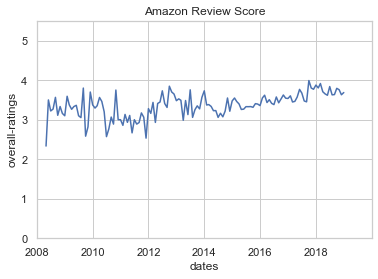

In [227]:
# Trend overtime (review score) for Amazon
sns.set_theme(style="whitegrid")
amazonfig = sns.lineplot(data=amazondf, x="dates", y="overall-ratings").set(title='Amazon Review Score')
plt.ylim(0, 5.5)
plt.xlim(np.datetime64('2008-01-01'), np.datetime64('2019-12-31'))

(13879.0, 18261.0)

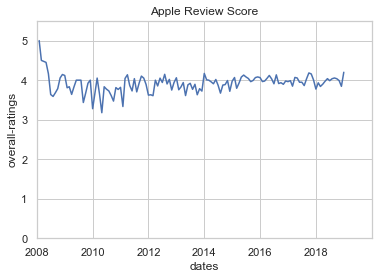

In [228]:
# Trend overtime (review score) for Apple
applefig = sns.lineplot(data=appledf, x="dates", y="overall-ratings").set(title='Apple Review Score')
plt.ylim(0, 5.5)
plt.xlim(np.datetime64('2008-01-01'), np.datetime64('2019-12-31'))

(13879.0, 18261.0)

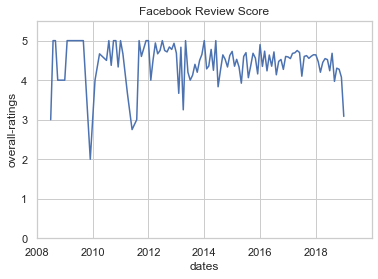

In [229]:
# Trend overtime (review score) for Facebook
facebookfig = sns.lineplot(data=facebookdf, x="dates", y="overall-ratings").set(title='Facebook Review Score')
plt.ylim(0, 5.5)
plt.xlim(np.datetime64('2008-01-01'), np.datetime64('2019-12-31'))

(13879.0, 18261.0)

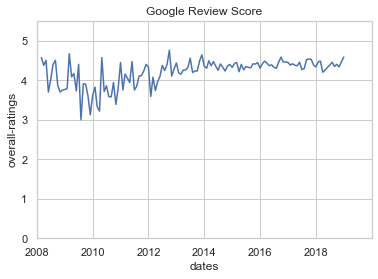

In [230]:
# Trend overtime (review score) for Google
googlefig = sns.lineplot(data=googledf, x="dates", y="overall-ratings").set(title='Google Review Score')
plt.ylim(0, 5.5)
plt.xlim(np.datetime64('2008-01-01'), np.datetime64('2019-12-31'))

(13879.0, 18261.0)

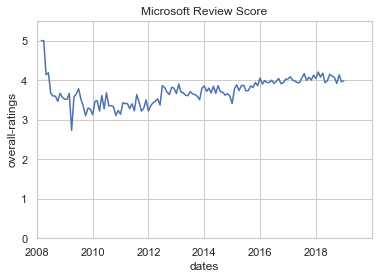

In [231]:
# Trend overtime (review score) for Microsoft
microsoftfig = sns.lineplot(data=microsoftdf, x="dates", y="overall-ratings").set(title='Microsoft Review Score')
plt.ylim(0, 5.5)
plt.xlim(np.datetime64('2008-01-01'), np.datetime64('2019-12-31'))

(13879.0, 18261.0)

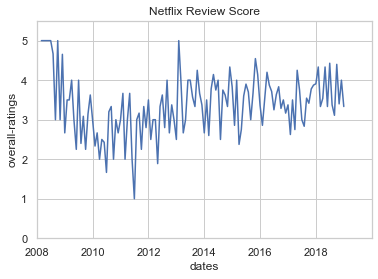

In [232]:
# Trend overtime (review score) for Netflix
netflixfig = sns.lineplot(data=netflixdf, x="dates", y="overall-ratings").set(title='Netflix Review Score')
plt.ylim(0, 5.5)
plt.xlim(np.datetime64('2008-01-01'), np.datetime64('2019-12-31'))

### Comparison of companies in terms of star ratings

In [233]:
# Make 'company' index to a column
meanstardf = meanstardf.reset_index(level='company')

In [234]:
# Rename columns
meanstardf.rename(columns = {'work-balance-stars':'work life balance', 'culture-values-stars':'culture values', 'carrer-opportunities-stars': 'career opportunities', 'comp-benefit-stars':'company benefits', 'senior-mangemnet-stars': 'senior management'}, inplace = True)

In [235]:
# Convert to long form
meanstardf = meanstardf.melt('company', var_name='stars', value_name='values')

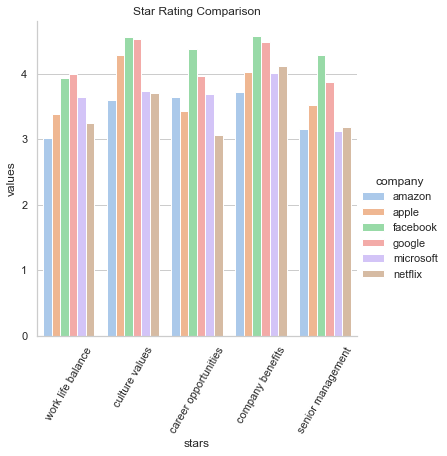

In [236]:
# Plot values
starfig = sns.catplot(y = 'values', x = 'stars', data = meanstardf, kind = 'bar', hue = 'company', palette="pastel").set(title='Star Rating Comparison')
starfig.ax.tick_params(axis='x', rotation=60)